In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

file_name = list(uploaded.keys())[0]

df = pd.read_excel(io.BytesIO(uploaded[file_name]), sheet_name='selected quotes')

df.head()

Saving treasury_quotes_2025-11-28.xlsx to treasury_quotes_2025-11-28 (9).xlsx


,KYTREASNO,type,quote date,issue date,maturity date,ttm,accrual fraction,cpn rate,bid,ask,price,accrued int,dirty price,ytm,total size,duration
0,208227,note,2025-11-28,2024-05-31,2026-05-31,0.503765,0.989071,4.875000,100.521406,100.531220,100.526313,2.410861,102.937174,0.038263,71425000000.000000,0.492305
1,208316,note,2025-11-28,2024-11-30,2026-11-30,1.004791,0.989071,4.250000,100.572266,100.591764,100.582015,2.101776,102.683791,0.036575,73149000000.000000,0.974601
2,208399,note,2025-11-28,2025-05-31,2027-05-31,1.503080,0.989071,3.875000,100.453125,100.472656,100.462891,1.916325,102.379216,0.035621,78440000000.000000,1.448055
3,208484,note,2025-11-28,2025-11-30,2027-11-30,2.004107,0.000000,3.375000,99.765625,99.769531,99.767578,0.000000,99.767578,0.034889,NaN,1.956136
4,208058,note,2025-11-28,2023-05-31,2028-05-31,2.505133,0.989071,3.625000,100.312500,100.332031,100.322266,1.792691,102.114957,0.034901,49363000000.000000,2.376588


In [ ]:
import numpy as np

row = df.iloc[0]

ttm = row['ttm']
FV = 100
c = row['cpn rate'] / 100 / 2 * FV

price = row['price']

final_cashflow = FV + c
DF = price / final_cashflow


spot_semiann = 2 * ((1 / DF)**(1 / (2 * ttm)) - 1)

spot_cont = -np.log(DF) / ttm

print(f"First Bond (TTM ≈ {ttm:.2f} years)")
print(f"Clean Price: {price}")
print(f"Principal (FV): {FV}")
print(f"Coupon Payment: {c:.6f}")
print(f"Discount Factor: {DF:.6f}")
print(f"Semiannual Spot Rate: {spot_semiann:.6%}")
print(f"Continuous Spot Rate: {spot_cont:.6%}")

First Bond (TTM ≈ 0.50 years)
Clean Price: 100.52631295
Principal (FV): 100
Coupon Payment: 2.437500
Discount Factor: 0.981343
Semiannual Spot Rate: 3.773681%
Continuous Spot Rate: 3.738521%


In [ ]:
import numpy as np
import pandas as pd

df = df.sort_values('ttm').reset_index(drop=True)

df['DiscountFactor'] = np.nan
df['SpotSemiAnn'] = np.nan
df['SpotCont'] = np.nan

for i, row in df.iterrows():
    ttm = row['ttm']
    FV = 100
    c = row['cpn rate'] / 100 / 2 * FV
    price = row['price']

    n_coupons = int(np.floor(ttm / 0.5))
    coupon_times = np.arange(0.5, ttm + 0.01, 0.5)

    pv_previous = 0
    for t_j in coupon_times[:-1]:
        df_row = df[df['ttm'] == t_j]
        if not df_row.empty:
            DF_j = df_row['DiscountFactor'].values[0]
        else:
            DF_j = 1
        pv_previous += c * DF_j

    final_cashflow = FV + c
    DF = (price - pv_previous) / final_cashflow
    df.loc[i, 'DiscountFactor'] = DF

    # Spot
    df.loc[i, 'SpotSemiAnn'] = 2 * ((1 / DF)**(1 / (2 * ttm)) - 1)
    df.loc[i, 'SpotCont'] = -np.log(DF) / ttm

#
display(df[['ttm', 'cpn rate', 'price', 'DiscountFactor', 'SpotSemiAnn', 'SpotCont']])


,ttm,cpn rate,price,DiscountFactor,SpotSemiAnn,SpotCont
0,0.503765,4.875000,100.526313,0.981343,0.037737,0.037385
1,1.004791,4.250000,100.582015,0.964083,0.036736,0.036403
2,1.503080,3.875000,100.462891,0.947521,0.036188,0.035864
3,2.004107,3.375000,99.767578,0.931335,0.035812,0.035495
4,2.505133,3.625000,100.322266,0.914154,0.036152,0.035829
5,3.006160,4.375000,102.455078,0.895585,0.037023,0.036684
6,3.504449,4.500000,103.189453,0.877158,0.037752,0.037400
7,4.005476,4.125000,102.105469,0.858964,0.038318,0.037955
8,4.503765,4.000000,101.757812,0.840763,0.038884,0.038511
9,5.004791,3.500000,99.550781,0.823595,0.039157,0.038778


In [ ]:
row_index = 9
row = df.iloc[row_index]

print(f"Bond {row_index + 1} (TTM ≈ {row['ttm']:.2f} years)")
print(f"Coupon Rate: {row['cpn rate']}%")
print(f"Price: {row['price']}")
print(f"Discount Factor: {row['DiscountFactor']:.6f}")
print(f"Semiannual Spot Rate: {row['SpotSemiAnn']:.6%}")
print(f"Continuous Spot Rate: {row['SpotCont']:.6%}")

Bond 10 (TTM ≈ 5.00 years)
Coupon Rate: 3.5%
Price: 99.55078125
Discount Factor: 0.823595
Semiannual Spot Rate: 3.915652%
Continuous Spot Rate: 3.877814%


In [ ]:
T_list = []
forward_DF_list = []
forward_semi_list = []
forward_cont_list = []

for i in range(len(df)-1):
    T_start = df.loc[i, 'ttm']
    T_end = df.loc[i+1, 'ttm']

    if abs(T_end - T_start - 0.5) < 0.05:
        DF_start = df.loc[i, 'DiscountFactor']
        DF_end = df.loc[i+1, 'DiscountFactor']

        DF_forward = DF_end / DF_start
        f_semi = 2 * (1 / DF_forward - 1)
        f_cont = -np.log(DF_forward) / 0.5

        T_list.append(T_start)
        forward_DF_list.append(DF_forward)
        forward_semi_list.append(f_semi)
        forward_cont_list.append(f_cont)

forward_df = pd.DataFrame({
    'T (starting maturity)': T_list,
    'Forward Discount': forward_DF_list,
    'Forward Rate (Semiannual)': forward_semi_list,
    'Forward Rate (Continuous)': forward_cont_list
})

display(forward_df)

row_index = 9
row = forward_df.iloc[row_index]

print("9th row of forward rates table:")
print(f"T (starting maturity): {row['T (starting maturity)']:.4f}")
print(f"Forward Discount: {row['Forward Discount']:.4f}")
print(f"Forward Rate (Semiannual): {row['Forward Rate (Semiannual)']:.4f}")
print(f"Forward Rate (Continuous): {row['Forward Rate (Continuous)']:.4f}")


,T (starting maturity),Forward Discount,Forward Rate (Semiannual),Forward Rate (Continuous)
0,0.503765,0.982412,0.035805,0.035488
1,1.004791,0.982820,0.034960,0.034658
2,1.503080,0.982917,0.034759,0.034461
3,2.004107,0.981552,0.037589,0.037240
4,2.505133,0.979687,0.041467,0.041043
5,3.006160,0.979425,0.042014,0.041579
6,3.504449,0.979257,0.042365,0.041922
7,4.005476,0.978811,0.043296,0.042834
8,4.503765,0.979580,0.041690,0.041262
9,5.004791,0.968959,0.064070,0.063065


9th row of forward rates table:
T (starting maturity): 5.0048
Forward Discount: 0.9690
Forward Rate (Semiannual): 0.0641
Forward Rate (Continuous): 0.0631


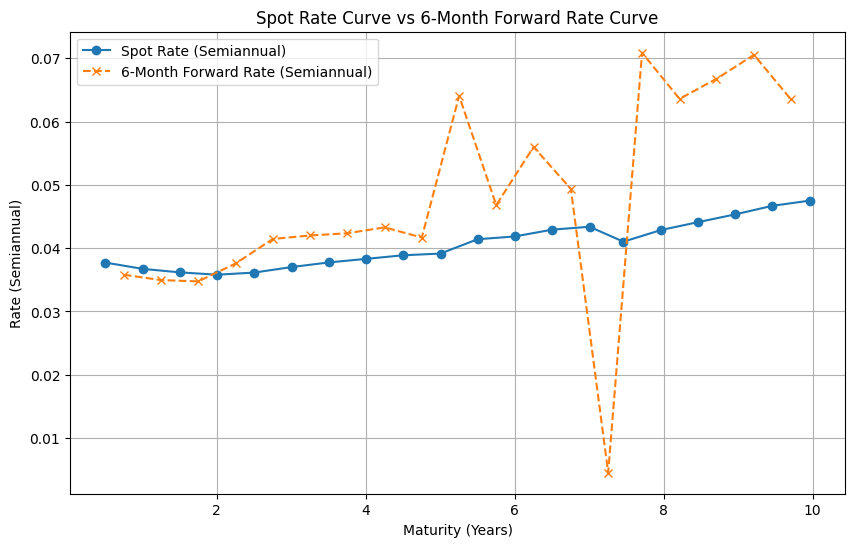

Highest forward rate: 7.0895% occurs from T = 7.46 to 7.96 years.


In [ ]:
import matplotlib.pyplot as plt

spot_ttm = df['ttm']
spot_semi = df['SpotSemiAnn']
forward_ttm = forward_df['T (starting maturity)']
forward_semi = forward_df['Forward Rate (Semiannual)']

plt.figure(figsize=(10,6))
plt.plot(spot_ttm, spot_semi, marker='o', label='Spot Rate (Semiannual)')
plt.plot(forward_ttm + 0.25, forward_semi, marker='x', linestyle='--', label='6-Month Forward Rate (Semiannual)')
plt.xlabel('Maturity (Years)')
plt.ylabel('Rate (Semiannual)')
plt.title('Spot Rate Curve vs 6-Month Forward Rate Curve')
plt.grid(True)
plt.legend()
plt.show()

max_forward_idx = forward_semi.idxmax()
T_start_max = forward_df.loc[max_forward_idx, 'T (starting maturity)']
T_end_max = T_start_max + 0.5
max_forward_rate = forward_df.loc[max_forward_idx, 'Forward Rate (Semiannual)']

print(f"Highest forward rate: {max_forward_rate:.4%} occurs from T = {T_start_max:.2f} to {T_end_max:.2f} years.")